# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristobal Ramos
- Nombre de alumno 2: Catalina Lizana

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/CatalinaLizanaG/Laboratorio-de-Programaci-n.git)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Al hacer una tarea de aprendizaje supervisado, se particionan los datos en (al menos) dos grupos. Por un lado se deja un porcentaje de los datos para entrenar el modelo, es decir, que el modelo aprenda las features para poder hacer las predicciones requeridas (a estos les llamamos datos de entrenamiento), y por otro lado, se deja el porcentaje restante para utilizar sus etiquetas y poder testear las predicciones del modelo con datos que no fueron utilizados en el entrenamiento (a estos se les denomina datos de validación).

2. El principal desafío de clasificar datos de forma no supervisada es la ausencia de etiquetas, es decir, encontrar agrupaciones coherentes para los datos sin tener "label" que me diga si ese dato debería ser parte o no del grupo. 

3. La matriz de confusión es una herramienta que agrupa los resultados del modelo en comparación a las clasificaciones reales de los datos, es decir, junta la información de la cantidad de predicciones correctas en cada clase (por ejemplo: verdaderos positivos y verdaders negativos) y la cantidad de predicciones incorrectas en cada clase (por ejemplo: falsos positivos y falsos negativos). Se utiliza para evaluar el desempeño del modelo en función de la calidad de las predicciones.

4. Formulas:
$$\text{accuracy} = \frac{\text{número de predicciones correctas}}{\text{número de predicciones totales}}$$

$$\text{Precision }:= P = \frac{\text{Clasificados correctamente como positivo}}{\text{Todos los predichos como positivos}} =\frac{TP}{(TP + FP)}$$

$$\text{Recall }:= R = \frac{\text{Clasificados correctamente como positivo}}{\text{Todos los que debería haber clasificado como positivos}}  = \frac{TP}{(TP+FN)}$$

$$\text{F1 score }:= F = \frac{2PR}{(P+R)}$$

**Acuracy**: Se interpreta como el porcentaje o la proporción de buenas predicciones, es decir, cantidad de veces que predice bien. 

**Preision**: Se interpreta como la proporción de buenas predicciones positivas con respecto a todos los predichos positivos, es decir, viendo todas las veces que predijo algo como positivo, da cuenta de la cantidad de veces en que la prediccion fue acertada.  

**Recall**: Se interpreta como la proporción de buenas predicciones pero solo de la clase positiva, es decir, cantidad de veces que predice bien dentro de la clase positiva. 

**F1-score**: Combina precisión y recall, de tal forma que valores de $F1-score$ altos indican buen rendimiento en precisión y también en recall, pues su cálculo castiga cuando estas últimas difieren mucho. 


5. Explique qué métrica recomendaría para los siguientes contextos de clasificación.
recall --< es mas caro FN
pres --> mas caro pred falsos positvos
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera:s F1-SCORE pues en este contexto son muy caros los falsos negativos (no predecir la falla y no poder anteponerse) y l0s falsos positivos (predecir una falsa falla y parar la producción en vano)   
  * Detección de enfermedades altamente contagiosas: RECALL pues en este contexto es más caro la predicción de falsos negativos (detecta falsamente que alguien no esta enfermo y se propaga la enfermedad)
  * Aprobación de créditos de alto riesgo: PRECISION pues en este contexto es más caro la predicción de falsos positivo (otorgar créditos a personas que no pagarán)
  * Detección de crímenes: RECALL pues en este contexto es más caro la predicción de falsos negativos (se detecta falsamete que algo no es un crímen y no se hace algo para evitarlo)

6. La calibración del modelo consiste en forzar que sus salidas esten entre 0 y 1, lo que permite interpretar los resultados como probabilidades, o intuitivamente, como frecuencias a largo plazo.

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
#try:
 #   from google.colab import drive
  #  drive.mount("/content/drive")
   # path = 'Dirección donde tiene los archivos en el Drive'
#except:
   # print('Ignorando conexión drive-colab')

In [372]:
import pandas as pd
df = pd.read_csv("stats_players.csv")
df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [12]:
#1. Genere los labels para la clasificación binaria en una variable llamada `label`. 
#Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país.

df['label'] = df['National_Position'].fillna(0).apply(lambda x: 1 if x != 0 else x) 
df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,0


In [14]:
#2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. 
df['label'].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

Notamos que la cantidad de jugadores en la clase 0 son un poco más de 15 veces la cantidad de jugadores de clase 1, por ende, tenemos clases desbalanceadas.

In [17]:
df['Work_Rate'].value_counts()

Work_Rate
Medium / Medium    9897
High / Medium      2918
Medium / High      1534
Medium / Low        845
High / High         747
High / Low          730
Low / Medium        449
Low / High          438
Low / Low            30
Name: count, dtype: int64

In [98]:
#3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) 
#para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

to_int = FunctionTransformer(lambda x: x.astype(int))
        
col_transformer = ColumnTransformer(transformers=[ ('OHEncoder', OneHotEncoder(),['Club_Position'] ), ('to_int', to_int, ['Weak_foot', 'Skill_Moves']),
        ('OEncoder', OrdinalEncoder(categories= [["Low / Low", "Low / Medium", "Low / High", "Medium / Low", "Medium / Medium", "Medium / High", "High / Low", "High / Medium", "High / High"],['Right', 'Left']]),  ['Work_Rate', 'Preffered_Foot']),
        ('StandardScaler', StandardScaler(),['Height',  'Weight']),
        ('MinMax', MinMaxScaler(), ['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
                                    'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
                                    'Stamina', 'Strength', 'Balance', 'Agility','Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
                                    'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys' ])]) 

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables, al igual que las transformaciones aplicadas.
 
* La variable 'Club_Position' es categórica por ende usamos OneHotEncoder para poder transformarla a numérica y usarla en el modelo
* Las variables 'Weak_foot' y 'Skill_moves' a pesar de ser categóricas sus categorias son números de 1 a 5, ya que, de alguna forma se estan evaluando estos atributos, por ende, las transformamos a enteros.
* 'Work_Rate' tambien es una variable categórica pero ordenable, por ello usamos OrdinalEncoder y le damos el orden en que debe ordenar las categorias.
* 'Preffered_Foot' puede ser 'Right' o 'Left' por ende, lo transformamos con OrdinalEncoder para pasar estos valores a 0 y 1.
* 'Height' y 'Weight' son variables numéricas pero por lo observado en el archivo  Player_Stats_Report.html, vemos que presentan distribuciones muy parecidas a normales, por ello es que decidimos escalarlas.
* Por último, el resto de atributos son numéricos y de alguna forma lo que hacen es rankear las habilidades de los jugadores, luego para poder trabajar con estas variables en un mismo rango (entre 0 y 1)  aplicamos  MinMaxScaler.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [104]:
#Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba (la proporción queda a su juicio).
#En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento.

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

features = df.drop(columns=["label", "Name", "Nationality", "National_Position"])   # Columnas Name y Nacionality son representativas de cada jugador y Nacional_Position es la usada para los labels
labels = df.loc[:, "label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=25)

In [106]:
#Defina un pipeline llamado pipeline_xgboost y otro llamado pipeline_lightgbm. 
#Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

pipeline_xgboost = Pipeline([('Transformer', col_transformer), ('Clasificador',  XGBClassifier() ) ])
pipeline_lightgbm = Pipeline([('Transformer', col_transformer), ('Clasificador',LGBMClassifier(verbose=-1) )])


In [108]:
#Entrene los pipelines
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)


Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('OHEncoder', OneHotEncoder(),
                                                  ['Club_Position']),
                                                 ('to_int',
                                                  FunctionTransformer(func=<function <lambda> at 0x000001D390675E40>),
                                                  ['Weak_foot', 'Skill_Moves']),
                                                 ('OEncoder',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              '/ '
                                                                              'Low',
                                                                              'Low '
                                                                              '/ '
                                                                              'Medium',
                                                                              'Low '
                                                                              '/ '
                                                                              'High',
                                                                              'Medium '
                                                                              '/ '
                                                                              'Low',
                                                                              'Medium '
                                                                              '/ '
                                                                              'Medium',
                                                                              'Medium '
                                                                              '/ '
                                                                              '...
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy',
                                                   'Penalties', 'Volleys'])])),
                ('Clasificador', LGBMClassifier(verbose=-1))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [32]:
# Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. 
#Verifique sus resultados usando classification_report. 

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

y_pred_xgb = pipeline_xgboost.predict(X_test)
acc_score = round(accuracy_score(y_test, y_pred_xgb),2)     #Accuracy
prec_score = precision_score(y_test, y_pred_xgb).round(2)   #Precisión
rec_score = recall_score(y_test, y_pred_xgb).round(2)       #Recall
print(f'Accuracy = {acc_score}, Precisión = {prec_score}, Recall = {rec_score}')
print(classification_report(y_test, y_pred_xgb))


Accuracy = 0.94, Precisión = 0.52, Recall = 0.14
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.52      0.14      0.23       215

    accuracy                           0.94      3518
   macro avg       0.73      0.57      0.60      3518
weighted avg       0.92      0.94      0.92      3518



In [33]:
y_pred_lgbm = pipeline_lightgbm.predict(X_test)
acc_score = round(accuracy_score(y_test, y_pred_lgbm),2)
prec_score = precision_score(y_test, y_pred_lgbm).round(2)
rec_score = recall_score(y_test, y_pred_lgbm).round(2)
print(f'Accuracy = {acc_score}, Precisión = {prec_score}, Recall = {rec_score}')
print(classification_report(y_test, y_pred_lgbm))

Accuracy = 0.94, Precisión = 0.52, Recall = 0.11
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3303
           1       0.52      0.11      0.18       215

    accuracy                           0.94      3518
   macro avg       0.73      0.55      0.58      3518
weighted avg       0.92      0.94      0.92      3518



2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos.

Un accuracy de 0.94 significa que el 94% de los datos de prueba se clasifican correctamente, pero dado los bajos valores de precision y recall (con ambos algoritmos) de la clase positiva, notamos que solo un 11% (14%) de los jugadores seleccionados son clasificados efectivamente como tal y solo un 52% de los jugadores etiquetados como seleccionados por el algoritmo, son realmente seleccionados. De lo anterior se concluye los datos clasificados correctamente se concentran en la clase negativa que como posee más muestras y por ende, el algortimo caracteriza mejor los atributos de esta clase, es la que presenta mejores clasificaciones.

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño:

La métrica más adecuada en este caso, para evaluar los algoritmos es recall, ya que nos indica la cantidad de jugadores correctamente clasificados en su categoría. En este sentido el modelo con mejor desempeño fue lightgbm.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [43]:
#1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
df2 = pd.read_csv("stats_players.csv")
mapa = {'ST': 'ataque', 'CF': 'ataque','RW': 'central_ataque', 'CAM': 'central_ataque', 'LW': 'central_ataque',
               'RM': 'central', 'CM': 'central', 'LM': 'central', 'RWB': 'central_defensa', 'CDM': 'central_defensa', 'LWB': 'central_defensa',
               'RB': 'defensa', 'CB': 'defensa', 'LB': 'defensa', 'GK': 'arquero'}

df2['label'] = df2['Club_Position'].map(mapa)
df2 = df2.dropna(subset=['label'])
df2

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,central_ataque
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,central_ataque
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,central_ataque
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,ataque
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,arquero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17298,Raymond Skjelde,Norway,NaN,CB,185,75,Right,18,Medium / Medium,2,...,65,44,35,22,25,24,22,41,31,defensa
17301,Andrew O'Connor,Republic of Ireland,NaN,LB,175,73,Left,21,Medium / Medium,3,...,55,43,26,28,29,30,30,31,20,defensa
17310,Tom Bolarinwa,England,NaN,RM,180,80,Right,26,Medium / Medium,3,...,54,22,38,37,37,37,32,29,29,central
17312,Zak Mills,England,NaN,RB,182,83,Right,24,Medium / Medium,4,...,61,43,22,24,28,30,32,39,31,defensa


In [45]:
#2. Cuente cuántos por clase quedan.
df2['label'].value_counts()

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

In [144]:
#3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
from catboost import CatBoostClassifier     # Usamos catBoost pues el atributo a clasificar es categórico 

col_transformer = ColumnTransformer(transformers=[ ('to_int', to_int , ['Weak_foot', 'Skill_Moves']),
        ('OEncoder', OrdinalEncoder(categories= [["Low / Low", "Low / Medium", "Low / High", "Medium / Low", "Medium / Medium", "Medium / High", "High / Low", "High / Medium", "High / High"],['Right', 'Left']]),  ['Work_Rate', 'Preffered_Foot']),
        ('StandardScaler', StandardScaler(),['Height',  'Weight']),
        ('MinMax', MinMaxScaler(), ['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
                                    'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
                                    'Stamina', 'Strength', 'Balance', 'Agility','Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
                                    'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys' ])]) 


features = df2.drop(columns=["label", "Name", "Nationality", "Club_Position"])
labels = df2.loc[:, "label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=25)

pipeline_catboost = Pipeline([('Transformer', col_transformer), ('Clasificador',  CatBoostClassifier(verbose=0) )])
pipeline_catboost.fit(X_train, y_train)
y_pred_cb = pipeline_catboost.predict(X_test)
print(classification_report(y_test, y_pred_cb))


                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.89      0.84      0.86        86
        central       0.61      0.61      0.61       182
 central_ataque       0.53      0.48      0.50       116
central_defensa       0.67      0.24      0.35        42
        defensa       0.83      0.97      0.90       236

       accuracy                           0.77       788
      macro avg       0.75      0.69      0.70       788
   weighted avg       0.76      0.77      0.76       788



4. Comente los resultados obtenidos.

Vemos que la clase 'arquero' es la que presenta mejores resultados, ya que todos los arqueros fueron correctamente clasificados como tal y no se clasificó a ningún jugador de otra posición en esta categoría. Por otro lado, 'central_defensa' es la clase que el algortimo identifica peor, ya que solo el 24 de jugadores de esta posición se identificaron correctamente, esto puede tener directa relación con que esta categoría es la que tiene menor cantidad de muestras.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#1.
clf = setup(df, target='label')
best_model = compare_models(['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'])

2.Explique en brevemente que son los modelos de la siguiente lista ['et', 'rf', 'dt'] y como funcionan.
* Decision Tree Classifier ('dt'): Es el modelo basado en arboles de decisión más simple, iterativamenta divide los datos utilizando un atributo hasta alcazar algun criterio de parada.
* Random Forest Classifier ('rf'): Usa n árboles de decisión independientes que son entrenados con distintos conjunto. La predicción/clasificación final se hace promediando las predicciones/voto mayoritario de todos los árboles.
* Extra Trees Classifier ('et'): Variante del Random Forest, donde las divisiones en cada nodo se seleccionan de manera aleatoria.


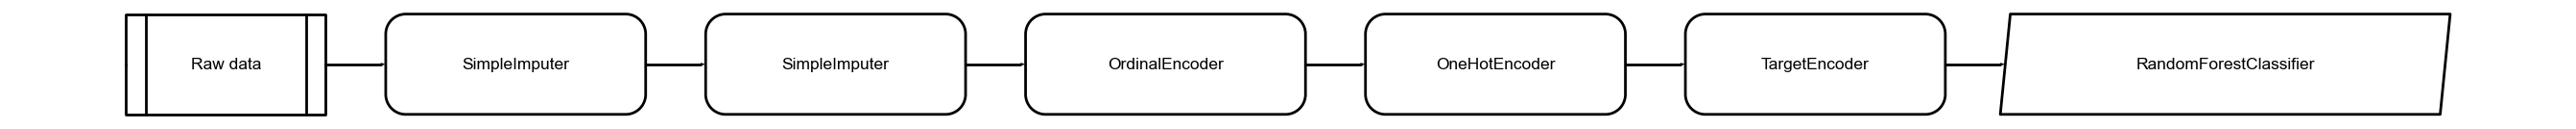

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
#3.
clf = setup(df, target='label')
final_model = create_model('rf')
evaluate_model(final_model)      # Evaluar el modelo
#AL parecer mi compu no me permite mostrar los graficos con evaluate_model asi que usaré plot_model para plotearlos de a uno

In [ ]:
plot_model(final_model, plot='confusion_matrix')

In [ ]:
plot_model(final_model, plot='threshold')

In [ ]:
plot_model(final_model, plot='feature')

In [ ]:
plot_model(final_model, plot='learning')

* ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?

  Notamos que hay 121 VP y 4953 VN, siendo este último superior dado el desbalanceo de la muestra.

* ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  
  Vemos que el mejor umbral para las predicciones es entre 0.4 y 0.6, aunque 0.3 igualmente es un buen umbral. 
  
* ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  
  Las variables con mejor desempeño son 'Name', pues es distintiva de cada jugador, 'Nationa_position'
  
* ¿El modelo presenta algún problema?
  
  Si, ya que el score de entrenamiento es 0 para toda cantidad de muestras, este probablemente se deba a un sobreajuste en el conjunto de entrenamiento.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [335]:
# 1.Inicie entrenando un modelo XGBoost con todas las características disponibles.
import xgboost as xgb

features = df.drop(columns=["label"])
labels = df.loc[:, "label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=25)


col_transformer2 = ColumnTransformer(transformers=[ #('to_int', to_int , ['Weak_foot', 'Skill_Moves']), #no incluimos to_int, pues trae problemas despues
        ('OEncoder', OrdinalEncoder(categories= [["Low / Low", "Low / Medium", "Low / High", "Medium / Low", "Medium / Medium", "Medium / High", "High / Low", "High / Medium", "High / High"],['Right', 'Left']]),  ['Work_Rate', 'Preffered_Foot']),
        ('StandardScaler', StandardScaler(),['Height',  'Weight']),
        ('MinMax', MinMaxScaler(), ['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
                                    'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
                                    'Stamina', 'Strength', 'Balance', 'Agility','Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots',
                                    'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys' ])]) 


xgboost_pipe = Pipeline([('Transformer', col_transformer2), ('Clasificador',  XGBClassifier() ) ])

xgboost_pipe.fit(X_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('OEncoder',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              '/ '
                                                                              'Low',
                                                                              'Low '
                                                                              '/ '
                                                                              'Medium',
                                                                              'Low '
                                                                              '/ '
                                                                              'High',
                                                                              'Medium '
                                                                              '/ '
                                                                              'Low',
                                                                              'Medium '
                                                                              '/ '
                                                                              'Medium',
                                                                              'Medium '
                                                                              '/ '
                                                                              'High',
                                                                              'High '
                                                                              '/ '
                                                                              'Low',
                                                                              'High '
                                                                              '/ '
                                                                              'Medium',
                                                                              'High '
                                                                              '/ '
                                                                              'High'],
                                                                             ['Right',
                                                                              'Left']]),
                                                  ['Work_Rate',
                                                   'Preffered_Foot']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

<Axes: >

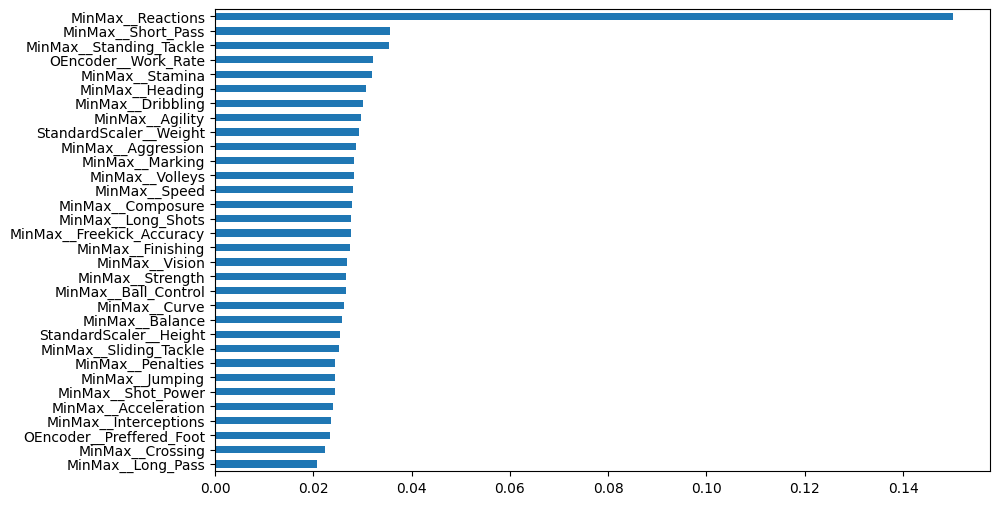

In [337]:
#2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. 
import matplotlib.pyplot as plt

columns_names = xgboost_pipe['Transformer'].get_feature_names_out() #features.columns #
feat_importances = pd.DataFrame(
    xgboost_pipe['Clasificador'].feature_importances_, 
    index=columns_names,
    columns=["Importance"]
)
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh', figsize=(10,6), legend=False)

In [272]:
#3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, 
#eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. 

import plotly.graph_objects as go
import numpy as np

def plot_line_std(x, y, std):
    # Crear una figura
    fig = go.Figure()

    # Añadir la línea principal
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Main Line'))

    # Añadir la banda de variación o desviación estándar
    fig.add_trace(go.Scatter(x=np.concatenate([x, x[::-1]]),
                             y=np.concatenate([y - std, (y + std)[::-1]]),
                             fill='toself',
                             fillcolor='rgba(0,100,80,0.2)',
                             line=dict(color='rgba(255,255,255,0)'),
                             name='Variation'))

    # Establecer el diseño del gráfico
    fig.update_layout(title='Precisión del modelo con el número de features',
                      template='simple_white',
                      showlegend=False,
                      xaxis_title='Número de features',
                      yaxis_title='Score')

    # Mostrar el gráfico
    fig.show()

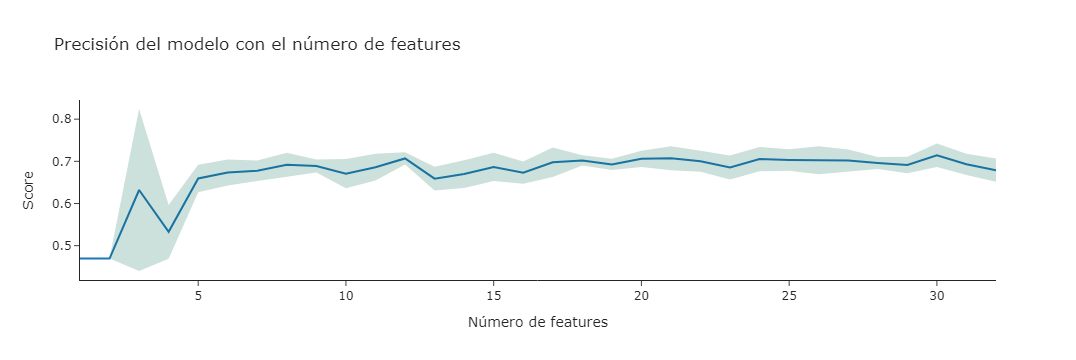

In [274]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Obtenemos X para el train para el ejemplo
array_X = xgboost_pipe['Transformer'].fit_transform(X_train)
cols_trans_name = xgboost_pipe['Transformer'].get_feature_names_out()
new_X_train = pd.DataFrame(array_X, columns=cols_trans_name)

# Lista para almacenar la precisión del modelo con cada número de características
precision_scores = []

# Crear un selector de características recursivo con validación cruzada
clf = xgboost_pipe['Clasificador']

# Iterar sobre las características y evaluar el modelo con cada adición
for i in range(1, len(cols_trans_name) + 1):
    # Seleccionar las primeras i características
    selected_features = cols_trans_name[:i]
    scores = cross_val_score(
        clf, new_X_train[selected_features], 
        y_train, cv=5, scoring='precision_macro'
    )    
    # Almacenar la precisión del modelo con i características
    precision_scores.append(scores)

# Calcular variación de los puntos
x = [i for i in range(1, len(cols_trans_name) + 1)]
y = np.array(precision_scores).mean(axis=1)
std = np.array(precision_scores).std(axis=1)

plot_line_std(x, y, std)

Consideramos las 5 features más importantes, pues luego de esta cantidad el score deja de aumentar consiiderablemente. 

In [339]:
#4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. 

features = df.drop(columns=["label"])
labels = df.loc[:, "label"]

# reduced features
features_reducidas = ['Reactions', 'Short_Pass', 'Standing_Tackle', 'Work_Rate', 'Stamina']

# ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
    ('OEncoder', OrdinalEncoder(categories=[["Low / Low", "Low / Medium", "Low / High", "Medium / Low", "Medium / Medium", "Medium / High", "High / Low", "High / Medium", "High / High"]]), ['Work_Rate']),
    ('MinMax', MinMaxScaler(), ['Reactions', 'Short_Pass', 'Standing_Tackle', 'Stamina'])  # Apply MinMaxScaler to reduced features
])


xgboost_pipe_red = Pipeline([('Transformer', col_transformer), ('Clasificador', XGBClassifier())])

# datos reducidos
X_train_feat_red = X_train[features_reducidas]
X_test_feat_red = X_test[features_reducidas]

# Train
xgboost_pipe_red.fit(X_train[features_reducidas], y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('OEncoder',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              '/ '
                                                                              'Low',
                                                                              'Low '
                                                                              '/ '
                                                                              'Medium',
                                                                              'Low '
                                                                              '/ '
                                                                              'High',
                                                                              'Medium '
                                                                              '/ '
                                                                              'Low',
                                                                              'Medium '
                                                                              '/ '
                                                                              'Medium',
                                                                              'Medium '
                                                                              '/ '
                                                                              'High',
                                                                              'High '
                                                                              '/ '
                                                                              'Low',
                                                                              'High '
                                                                              '/ '
                                                                              'Medium',
                                                                              'High '
                                                                              '/ '
                                                                              'High']]),
                                                  ['Work_Rate']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['Reactions', 'Short_Pass',
                                                   'Standing_Tackle',
                                                   'Stamina']...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

COMPARACIÓN

In [341]:
y_pred_xgb = xgboost_pipe.predict(X_test)
acc_score_xgb = round(accuracy_score(y_test, y_pred_xgb),2)
prec_score_xgb = precision_score(y_test, y_pred_xgb).round(2)
rec_score_xgb = recall_score(y_test, y_pred_xgb).round(2)

In [343]:
print("MODELO ORIGINAL")
print(f'Accuracy = {acc_score_xgb}, Precisión = {prec_score_xgb}, Recall = {rec_score_xgb} \n')
print(classification_report(y_test, y_pred_xgb))

MODELO ORIGINAL
Accuracy = 0.94, Precisión = 0.49, Recall = 0.12 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.49      0.12      0.19       215

    accuracy                           0.94      3518
   macro avg       0.72      0.56      0.58      3518
weighted avg       0.92      0.94      0.92      3518



In [345]:
y_pred_xgb_red = xgboost_pipe_red.predict(X_test_feat_red)
acc_score_xgb_red = round(accuracy_score(y_test, y_pred_xgb_red),2)
prec_score_xgb_red = precision_score(y_test, y_pred_xgb_red).round(2)
rec_score_xgb_red = recall_score(y_test, y_pred_xgb_red).round(2)

In [347]:
print("MODELO REDUCIDO")
print(f'Accuracy = {acc_score_xgb_red}, Precisión = {prec_score_xgb_red}, Recall = {rec_score_xgb_red} \n')
print(classification_report(y_test, y_pred_xgb_red))

MODELO REDUCIDO
Accuracy = 0.94, Precisión = 0.46, Recall = 0.1 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3303
           1       0.46      0.10      0.16       215

    accuracy                           0.94      3518
   macro avg       0.70      0.55      0.56      3518
weighted avg       0.91      0.94      0.92      3518



5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez?

    El rendimiento es similar, mismo accuracy y el modelo reducido alcanza casi la misma Precisión y Recall. 

  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización.
    
    El modelo reducido tiene mucho menos costo computacional al trabajar con menos variables y tiene un rendimiento similar al original, por lo que al momento de querer trabajar con muchos más datos, será preferible el modelo reducido, pues al ser más simple tambien reducirá el tiempo de entrenamiento. Además, al tener un rendimiento similar, la capacidad de generalización se mantendrá.  

  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo.os]

    El modelo reducido en efecto es más sencillo de explicar, pues al trabajar con solo las variables más importantes, disminuye también la cantidad de código, con lo que mejora la interpretabilidad del modelo. Mientras menos sean las varibales utilizadas, más explícito será el comportamiento del modelo. 
    

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [394]:
#1 Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. 

# Obtenemos X para el train para el ejemplo
array_X = xgboost_pipe_red['Transformer'].fit_transform(X_train_feat_red)
cols_trans_name = xgboost_pipe_red['Transformer'].get_feature_names_out()
new_X_train = pd.DataFrame(array_X, columns=cols_trans_name)

# Obtenemos X para el test para el ejemplo
array_X = xgboost_pipe_red['Transformer'].transform(X_test_feat_red)
cols_trans_name = xgboost_pipe_red['Transformer'].get_feature_names_out()
new_X_test = pd.DataFrame(array_X, columns=cols_trans_name)

new_y_train = (y_train == 1)
new_y_test = (y_test == 1)


In [428]:
from numpy import mean
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import brier_score_loss

# Entrenamos primero que todo un modelo
clf = xgboost_pipe_red['Clasificador']
clf.fit(new_X_train, new_y_train)
y_prob = clf.predict(new_X_test)

# Hacemos un Wrap sobre el modelo
calibrated = CalibratedClassifierCV(clf, method='isotonic', cv=5)
# Definimos procedimiento de evaluación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
# Evaluamos
estimator = cross_validate(
    calibrated, new_X_test, new_y_test, 
    scoring='roc_auc', cv=cv, n_jobs=-1, 
    return_estimator=True
)

breif_score = brier_score_loss(new_y_test, y_prob)
print("breif_score = ", breif_score)

breif_score =  0.06225127913587265


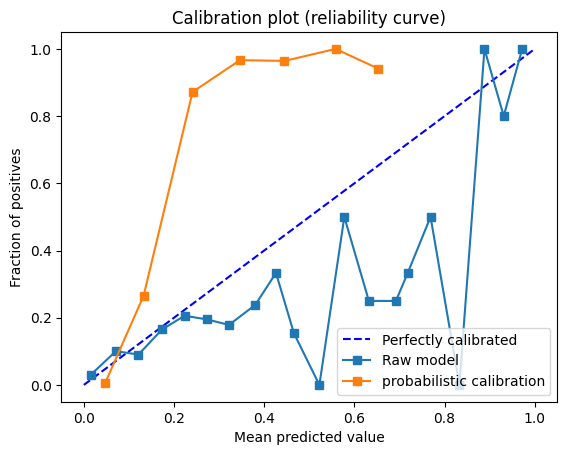

In [408]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Definimos figura para hacer el plot
fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

# Graficamos el primer modelo raw
prob_pos_dt = clf.predict_proba(new_X_test)[:, 1]
fraction_of_positives_dt, mean_predicted_value_dt = calibration_curve(new_y_test, prob_pos_dt, n_bins=20)
ax.plot(
    mean_predicted_value_dt, 
    fraction_of_positives_dt, "s-", label="%s" % ('Raw model')
)

# Graficamos el modelo calibrado
prob_pos_cc = estimator['estimator'][0].predict_proba(new_X_test)[:, 1]
fraction_of_positives_cc, mean_predicted_value_cc = calibration_curve(new_y_test, prob_pos_cc, n_bins=10)
ax.plot(mean_predicted_value_cc, fraction_of_positives_cc, "s-", label="%s" % ('probabilistic calibration'))

ax.legend(loc="lower right")
plt.show()